# Job Satisfaction

## Description

This project aims to analyze the impact of various socio-economic indicators on job satisfaction across multiple European countries in the year 2018. It utilizes survey data collected from Eurostat and is implemented in Python. The project focuses on key indicators, including weekly working hours, net income, the percentage of work from home, and the percentage of people working on weekends, among others. The goal is to gain insights into how these factors influence job satisfaction and whether there are variations among different European countries.

### Data

#### Data collection

Data used here has been collected from Eurostat. Eurostat collects data from various national statistical offices across the European Union. The data collection process involves regular reporting by member states on a wide range of topics, such as economic, social, and environmental indicators. This data is typically collected through surveys, censuses, administrative records, and other official sources.

The collected and processed data is stored in Eurostat's databases. Eurostat maintains various databases for different statistical domains, including national accounts, population and social conditions, agriculture, trade, and more. These databases are updated regularly.

#### Data source
You can consult tha main data source via the next link : 

https://ec.europa.eu/eurostat/web/main/data/database

A description of each indicator as well as the precise data source can be found in the anexed description to this file.

## EDA

In [255]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from scipy import stats
import seaborn as sns
import warnings
import plotly.io as pio
warnings.filterwarnings("ignore")

In [256]:
data_path = "C:/Users/osval/Desktop/Data/Job satisfaction/Data/data.csv"
data = pd.read_csv(data_path)
data.head()

,GEO,COUNTRY,AVG_WEEKLY_WORKING_HOURS,MEAN_NET_INCOME,MEDIAN_NET_INCOME,GENDER_PAY_GAP,INABILITY_UNEXPECTED_EXPENSES,WORKING_HOME,USUALLY_WORKING_EVENING,USUALLY_WORKING_SUNDAYS,USUALLY_WORKING_SATURDAYS,FINANTIAL_SITUATION_RATING,LONG_WORKING_HOURS,AVG_JOB_SATISFACTION
0,AT,Austria,36.7,27804,25176,20.4,20.1,21.9,11.5,15.0,27.4,7.3,11.0,8.0
1,BE,Belgium,37.3,25196,23686,5.8,24.5,22.7,9.9,12.0,22.2,7.0,9.3,7.5
2,BG,Bulgaria,40.7,4644,3590,13.9,32.1,0.9,11.1,7.8,17.5,4.3,1.3,6.4
3,CH,Switzerland,35.3,49607,43013,18.6,20.4,NaN,16.3,16.8,29.8,7.2,4.0,7.9
4,CY,Cyprus,39.4,17582,15336,10.4,49.5,2.1,11.3,14.7,31.1,6.1,10.7,7.3


#### Missing values

In [257]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 14 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   GEO                            33 non-null     object 
 1   COUNTRY                        33 non-null     object 
 2   AVG_WEEKLY_WORKING_HOURS       33 non-null     float64
 3   MEAN_NET_INCOME                33 non-null     int64  
 4   MEDIAN_NET_INCOME              33 non-null     int64  
 5   GENDER_PAY_GAP                 31 non-null     float64
 6   INABILITY_UNEXPECTED_EXPENSES  33 non-null     float64
 7   WORKING_HOME                   31 non-null     float64
 8   USUALLY_WORKING_EVENING        33 non-null     float64
 9   USUALLY_WORKING_SUNDAYS        33 non-null     float64
 10  USUALLY_WORKING_SATURDAYS      33 non-null     float64
 11  FINANTIAL_SITUATION_RATING     33 non-null     float64
 12  LONG_WORKING_HOURS             33 non-null     float

In [258]:
# As inputed data test for the GENDER_PAY_GAP is not that good we'll remove Turkiye and Serbia rows
data.drop([27,31], inplace=True)
data.set_index('GEO', inplace=True)

In [259]:
variables = [
    'AVG_WEEKLY_WORKING_HOURS', 'MEAN_NET_INCOME',
    'MEDIAN_NET_INCOME', 'GENDER_PAY_GAP', 'INABILITY_UNEXPECTED_EXPENSES',
    'WORKING_HOME', 'USUALLY_WORKING_EVENING', 'USUALLY_WORKING_SUNDAYS',
    'USUALLY_WORKING_SATURDAYS', 'FINANTIAL_SITUATION_RATING',
    'LONG_WORKING_HOURS', 'AVG_JOB_SATISFACTION'
]

Missing data inputation

In [260]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
imp.fit(data[variables])

# Input missing data
X_inputation = data[variables]
inputed_data = pd.DataFrame(np.round(imp.transform(X_inputation),2))
inputed_data.columns = variables

# Add removed columns
inputed_data['COUNTRY'] = data.reset_index()['COUNTRY']
inputed_data['GEO'] = data.reset_index()['GEO']
inputed_data.set_index('GEO', inplace=True)

### Visual analysis

#### Defined functions

In [261]:
NB_COUNTRIES = len(inputed_data['COUNTRY'])
FRANCE_IDX = inputed_data.reset_index().index[inputed_data['COUNTRY'] == "France"][0]

In [262]:
def plot_data_barplot(data, variable, title=None, highlighted_country = "France", yaxis_name=None, bars_color = 'lightslategray', highlight_color = 'crimson'):

    COUNTRY_IDX = data.reset_index().index[data['COUNTRY'] == highlighted_country][0]
    colors = [bars_color,] * NB_COUNTRIES # Number of Countries/Bars
    colors[COUNTRY_IDX] = highlight_color 

    fig = go.Figure(data=[go.Bar(y=inputed_data[variable], x=inputed_data["COUNTRY"],
        marker_color=colors, # marker color can be a single color value or an iterable
        text = inputed_data[variable],
        textposition='outside'
    )])

    # Remove x axis label
    fig.update_layout(yaxis_title=variable)

    if title == None :
        fig.update_layout(title_text=variable+' per country')
    else : 
        fig.update_layout(title_text= title)

    if yaxis_name != None : 
        fig.update_layout(
            yaxis_title= yaxis_name
        )

    fig.update_layout(
        autosize=False,
        width=1100,
        height=500
    )

    fig.update_layout(
        font=dict(
            size=10  # Set the font size here
        )
    )

    # Save image
    #fig.write_image('Images/'+variable+'.png')
    fig.show()

In [263]:
def plot_data_barplot_tops(data, variable, title=None, yaxis_name = None, bars_color = 'lightslategray', ntop=3):

    colors = [bars_color,] * NB_COUNTRIES # Number of Countries/Bars

    # Top countries
    top_idx = pd.Series(data.reset_index()[variable].nlargest(n=ntop).index)
    bottom_idx = pd.Series(data.reset_index()[variable].nsmallest(n=ntop).index)

    for i in range(ntop):
        colors[top_idx[i]] = 'rgb(46, 204, 113)'
        colors[bottom_idx[i]] = 'rgb(234, 32, 39)'

    fig = go.Figure(data=[go.Bar(y=data[variable], x=data["COUNTRY"],
        marker_color=colors, # marker color can be a single color value or an iterable
        text = data[variable],
        textposition='outside'
    )])

    # Plot mean value as a line
    mean_value = data[variable].mean()
    fig.add_hline(y=mean_value)
    fig.add_annotation(x=0.1, y=mean_value*1.06,
            text="Mean : "+str(round(mean_value,1)),
            showarrow=False)

    # Remove x axis label
    fig.update_layout(yaxis_title=variable)

    if title == None :
        fig.update_layout(title_text=variable+' per country')
    else : 
        fig.update_layout(title_text= title)

    if yaxis_name != None : 
        fig.update_layout(
            yaxis_title= yaxis_name
        )

    fig.update_layout(
        autosize=False,
        width=1100,
        height=500
    )

    fig.update_layout(
        font=dict(
            size=10  # Set the font size here
        )
    )

    # Save image
    #fig.write_image('Images/'+variable+'_tops.png')

    fig.show()

In [264]:
def top_n_dataframe(df, variable, n):
    top_n_countries = df.loc[df[variable].nlargest(n).index][['COUNTRY',variable]]
    bottom_n_countries = df.loc[df[variable].nsmallest(n).index][['COUNTRY',variable]]

    merged_data = pd.DataFrame()
    merged_data['Top DESC Country Name'] = top_n_countries.reset_index()['COUNTRY']
    merged_data['Top DESC Value'] = top_n_countries.reset_index()[variable]

    merged_data['Top ASC Country Name'] = bottom_n_countries.reset_index()['COUNTRY']
    merged_data['Top ASC Value'] = bottom_n_countries.reset_index()[variable]

    return merged_data

#### Univariable visuals

In [325]:

y_mean = x = inputed_data['MEAN_NET_INCOME']
y_median = x = inputed_data['MEDIAN_NET_INCOME']

colors_mean = ['rgb(55, 83, 109)',] * NB_COUNTRIES # Number of Countries/Bars
colors_median = ['rgb(26, 118, 255)',]  * NB_COUNTRIES
colors_mean[FRANCE_IDX] = 'rgb(181, 52, 113)' 
colors_median[FRANCE_IDX] = 'rgb(237, 76, 103)' 

fig = go.Figure()

fig.add_trace(go.Bar(x=inputed_data['COUNTRY'],
                y = y_mean,
                name='Mean income',
                marker_color=colors_mean,
                text = y_mean,
                textposition='inside'
                ))

fig.add_trace(go.Bar(x=inputed_data['COUNTRY'],
                y = y_median,
                name='Median income',
                marker_color=colors_median,
                text = y_median,
                textposition='inside'
                ))

fig.update_layout(title_text= "Mean and median average income per country <br><sup>Data extracted for 2018 from the Eurostat site</sup>")

# Legend position
fig.update_layout(legend=dict(
    orientation="h",
    yanchor="bottom",
    y=-.6,
    x=0
))



fig.show()

In [266]:
top_n_dataframe(inputed_data, 'MEAN_NET_INCOME', 3)

,Top DESC Country Name,Top DESC Value,Top ASC Country Name,Top ASC Value
0,Switzerland,49607.0,Romania,3825.0
1,Iceland,43769.0,Bulgaria,4644.0
2,Norway,42203.0,Hungary,6123.0


In [267]:
top_n_dataframe(inputed_data, 'MEDIAN_NET_INCOME', 3)

,Top DESC Country Name,Top DESC Value,Top ASC Country Name,Top ASC Value
0,Switzerland,43013.0,Romania,3284.0
1,Iceland,39918.0,Bulgaria,3590.0
2,Norway,39438.0,Hungary,5424.0


In [326]:
plot_data_barplot(inputed_data, "AVG_WEEKLY_WORKING_HOURS", 'Average working hours per week<br><sup>Data extracted for 2018 from the Eurostat site</sup>', "France", "Hours")

In [327]:
plot_data_barplot_tops(inputed_data, "AVG_WEEKLY_WORKING_HOURS", "Top 3 countries with most and less weekly working hours<br><sup>Data extracted for 2018 from the Eurostat site</sup>", "Hours")

In [270]:
top_n_dataframe(inputed_data, 'AVG_WEEKLY_WORKING_HOURS', 3)

,Top DESC Country Name,Top DESC Value,Top ASC Country Name,Top ASC Value
0,Greece,42.0,Netherlands,30.7
1,Bulgaria,40.7,Denmark,33.7
2,Poland,40.6,Norway,34.0


In [271]:
x = inputed_data['COUNTRY']
y = inputed_data['GENDER_PAY_GAP']

colors = ['lightslategray',] * NB_COUNTRIES # Number of Countries/Bars
colors[FRANCE_IDX] = 'crimson' 

colors_val = ["rgb(52, 73, 94)"] * NB_COUNTRIES
colors_val[FRANCE_IDX] = 'rgb(183, 21, 64)' 

fig = go.Figure(
        go.Bar(
            x=[100]* NB_COUNTRIES,
            y=x,
            marker_color=colors,
            text= pd.Series( list(map(lambda value : str(value)+"%", y)) ),
            textposition="inside",
            textfont=dict(color="white"),
            orientation="h"
        )
)

fig.add_trace(
    go.Bar(
        x=y,
        y=x,
        orientation="h",
        marker_color=colors_val
    )
)
fig.update_layout(title='Gender pay gap percentage per country', barmode="overlay", showlegend=False, template="presentation")

fig.update_yaxes(
    tickmode="array",
    categoryorder="total ascending",
    tickvals=x,
    ticktext=x,
    ticklabelposition="inside",
    tickfont=dict(color="white", size=14)
)
fig.update_xaxes(range=[0, 100], visible=False)

fig.update_layout(
    autosize=False,
    width=1000,
    height=1000
)

fig.show()

In [328]:
plot_data_barplot(inputed_data, "INABILITY_UNEXPECTED_EXPENSES", "Percentage of inability to face unexpected expenses <br><sup>Data extracted for 2018 from the Eurostat site</sup>", "France",'Employees percentage (%)','rgb(52, 73, 94)','rgb(183, 21, 64)')

In [329]:
plot_data_barplot_tops(inputed_data, "INABILITY_UNEXPECTED_EXPENSES", "Top 3 countries could face unexpected expenses<br><sup>Data extracted for 2018 from the Eurostat site</sup>",'Employees percentage (%)','rgb(52, 73, 94)')

In [274]:
top_n_dataframe(inputed_data, 'INABILITY_UNEXPECTED_EXPENSES', 3)

,Top DESC Country Name,Top DESC Value,Top ASC Country Name,Top ASC Value
0,Latvia,55.3,Malta,13.9
1,Croatia,52.9,Luxembourg,19.7
2,Greece,50.4,Norway,19.7


In [330]:
plot_data_barplot(inputed_data, "WORKING_HOME", "Percentage of employees that can work from home<br><sup>Data extracted for 2018 from the Eurostat site</sup>", "France","Percentage of employees (%)", 'rgb(18, 137, 167)')

In [331]:
plot_data_barplot_tops(inputed_data, "WORKING_HOME", "Top 3 countries with employees that can work from home<br><sup>Data extracted for 2018 from the Eurostat site</sup>",'Employees percentage (%)','rgb(18, 137, 167)')

In [277]:
top_n_dataframe(inputed_data, 'WORKING_HOME', 3)

,Top DESC Country Name,Top DESC Value,Top ASC Country Name,Top ASC Value
0,Netherlands,36.9,Romania,0.7
1,Sweden,33.2,Bulgaria,0.9
2,Finland,29.7,Cyprus,2.1


In [332]:
plot_data_barplot(inputed_data, "USUALLY_WORKING_EVENING", 'Percentage of employees working in the evenings<br><sup>Data extracted for 2018 from the Eurostat site</sup>', "France",'Employees percentage (%)', 'rgb(0, 98, 102)')

In [333]:
plot_data_barplot_tops(inputed_data, "USUALLY_WORKING_EVENING", "Top 3 countries working on evenings<br><sup>Data extracted for 2018 from the Eurostat site</sup>",'Employees percentage (%)','rgb(0, 98, 102)')

In [280]:
top_n_dataframe(inputed_data, 'USUALLY_WORKING_EVENING', 3)

,Top DESC Country Name,Top DESC Value,Top ASC Country Name,Top ASC Value
0,Greece,38.6,Croatia,4.2
1,Netherlands,31.7,France,4.7
2,Slovakia,23.6,Poland,7.3


In [334]:
plot_data_barplot(inputed_data, "USUALLY_WORKING_SUNDAYS", "Percentage of employees working on sundays<br><sup>Data extracted for 2018 from the Eurostat site</sup>", "France",'Employees percentage (%)', 'rgb(89, 98, 117)')

In [335]:
plot_data_barplot_tops(inputed_data, "USUALLY_WORKING_SUNDAYS", "Top 3 countries working on sundays<br><sup>Data extracted for 2018 from the Eurostat site</sup>",'Employees percentage (%)','rgb(89, 98, 117)')

In [283]:
top_n_dataframe(inputed_data, 'USUALLY_WORKING_SUNDAYS', 3)

,Top DESC Country Name,Top DESC Value,Top ASC Country Name,Top ASC Value
0,Ireland,21.0,Portugal,4.8
1,Netherlands,20.9,Poland,5.7
2,Spain,17.9,Hungary,6.1


In [336]:
plot_data_barplot(inputed_data, "USUALLY_WORKING_SATURDAYS", "Percentage of employees working on saturdays<br><sup>Data extracted for 2018 from the Eurostat site</sup>", "France",'Employees percentage (%)')

In [337]:
plot_data_barplot_tops(inputed_data, "USUALLY_WORKING_SATURDAYS", "Top 3 countries working on saturdays<br><sup>Data extracted for 2018 from the Eurostat site</sup>",'Employees percentage (%)')

In [286]:
top_n_dataframe(inputed_data, 'USUALLY_WORKING_SATURDAYS', 3)

,Top DESC Country Name,Top DESC Value,Top ASC Country Name,Top ASC Value
0,Greece,41.9,Portugal,8.1
1,Italy,35.7,Hungary,8.7
2,Ireland,32.7,Poland,12.2


In [338]:
plot_data_barplot(inputed_data, "AVG_JOB_SATISFACTION", "Job Satisfaction per country - Range from 0-10 <br><sup>Data extracted for 2018 from the Eurostat site</sup>", "France", 'Avg job satisfaction', 'rgb(230, 126, 34)')

In [339]:
plot_data_barplot_tops(inputed_data, "AVG_JOB_SATISFACTION", "Top 3 countries with most and less job satisfaction <br><sup>Data extracted for 2018 from the Eurostat site</sup>",'Average job satisfaction',"rgb(230, 126, 34)")

In [289]:
top_n_dataframe(inputed_data, 'AVG_JOB_SATISFACTION', 3)

,Top DESC Country Name,Top DESC Value,Top ASC Country Name,Top ASC Value
0,Finland,8.1,Greece,6.2
1,Iceland,8.1,Bulgaria,6.4
2,Norway,8.1,Germany,7.0


#### Multivariable visuals

In [340]:
fig = px.scatter(inputed_data, x="MEAN_NET_INCOME", y="AVG_JOB_SATISFACTION", color='AVG_WEEKLY_WORKING_HOURS',
                 trendline="ols", trendline_color_override="crimson",
                 hover_data=["COUNTRY","MEAN_NET_INCOME", "AVG_JOB_SATISFACTION"],
                 title='Job satisfaction vs Mean net income (2018)<br><sup>Each dot is a country</sup>',
                 labels={"AVG_WEEKLY_WORKING_HOURS":'Avg Working Hours'})

countries_list = ['Greece','Germany','Estonia','Poland','Norway','Bulgaria','Switzerland','France']

for country in countries_list:
    COUNTRY_IDX = inputed_data.reset_index().index[inputed_data['COUNTRY'] == country][0]

    fig.add_annotation(
        x=inputed_data.iloc[COUNTRY_IDX]['MEAN_NET_INCOME'], 
        y=inputed_data.iloc[COUNTRY_IDX]['AVG_JOB_SATISFACTION'],
        text=country, # text
        showarrow=True
    )

# Update axis labels
fig.update_layout(xaxis_title="Mean net income (euros)", 
                  yaxis_title="Average job satisfaction (0-10)")


fig.show()

$H_0$ : There exists no correlation between the Mean net income and the job satisfaction

$H_a$ : There is a correlation between the Mean net income and the job satisfaction

In [291]:
# Pearson correlation test
stats.pearsonr(inputed_data['AVG_JOB_SATISFACTION'], inputed_data['MEAN_NET_INCOME'])

PearsonRResult(statistic=0.67311724783946, pvalue=3.3352601737672374e-05)

Since p-value < 0.05, we reject the null hypothesis

In [341]:
fig = px.scatter(inputed_data, y="MEAN_NET_INCOME", x='AVG_WEEKLY_WORKING_HOURS',
                trendline="ols", trendline_color_override="crimson",
                hover_data=["COUNTRY","MEAN_NET_INCOME", "AVG_WEEKLY_WORKING_HOURS"],
                title='Mean net income and weekly working hours per country (2018)<br><sup>Each dot is a country</sup>')

countries_list = ['Greece','Germany','Estonia','Poland','Norway','Switzerland','France']

for country in countries_list:
    COUNTRY_IDX = inputed_data.reset_index().index[inputed_data['COUNTRY'] == country][0]

    fig.add_annotation(
        y=inputed_data.iloc[COUNTRY_IDX]['MEAN_NET_INCOME'], 
        x=inputed_data.iloc[COUNTRY_IDX]['AVG_WEEKLY_WORKING_HOURS'],
        text=country, # text
        showarrow=True
    )

# Update axis labels
fig.update_layout(xaxis_title="Avg Weekly working hours", 
                  yaxis_title="Mean net income (euros)")


fig.show()

$H_0$ : There exists no correlation between the Mean net income and the weekly working hours

$H_a$ : There is a correlation between the Mean net income and the weekly working hours

In [293]:
# Pearson correlation test
stats.pearsonr(inputed_data['MEAN_NET_INCOME'], inputed_data['AVG_WEEKLY_WORKING_HOURS'])

PearsonRResult(statistic=-0.6774407498153491, pvalue=2.8385157177914842e-05)

Since p-value < 0.05, we reject the null hypothesis

In [342]:
fig = px.scatter(inputed_data, y="AVG_JOB_SATISFACTION", x='AVG_WEEKLY_WORKING_HOURS',
                trendline="ols", trendline_color_override="crimson",
                hover_data=["COUNTRY","AVG_JOB_SATISFACTION", "AVG_WEEKLY_WORKING_HOURS"],
                title='Mean net income and weekly working hours per country (2018)<br><sup>Each dot is a country</sup>')

countries_list = ['Greece','Germany','Estonia','Poland','Norway','Switzerland','France']

for country in countries_list:
    COUNTRY_IDX = inputed_data.reset_index().index[inputed_data['COUNTRY'] == country][0]

    fig.add_annotation(
        y=inputed_data.iloc[COUNTRY_IDX]['AVG_JOB_SATISFACTION'], 
        x=inputed_data.iloc[COUNTRY_IDX]['AVG_WEEKLY_WORKING_HOURS'],
        text=country, # text
        showarrow=True
    )

# Update axis labels
fig.update_layout(xaxis_title="Avg Weekly working hours", 
                  yaxis_title="Avg Job Satisfaction")



fig.show()

$H_0$ : There exists no correlation between the Job satisfaction and the weekly working hours

$H_a$ : There is a correlation between the Job satisfaction and the weekly working hours

In [295]:
# Pearson correlation test
stats.pearsonr(inputed_data['AVG_JOB_SATISFACTION'], inputed_data['AVG_WEEKLY_WORKING_HOURS'])

PearsonRResult(statistic=-0.5138471404701173, pvalue=0.003108396301327377)

Since p-value < 0.05, we reject the null hypothesis

In [343]:
fig = px.scatter(inputed_data, y="AVG_JOB_SATISFACTION", x='INABILITY_UNEXPECTED_EXPENSES',
                trendline="ols", trendline_color_override="crimson",
                hover_data=["COUNTRY","AVG_JOB_SATISFACTION", "INABILITY_UNEXPECTED_EXPENSES"],
                title='Mean net income and weekly working hours per country (2018)<br><sup>Each dot is a country</sup>')

countries_list = ['Greece','Germany','Estonia','Norway','Switzerland','France']

for country in countries_list:
    COUNTRY_IDX = inputed_data.reset_index().index[inputed_data['COUNTRY'] == country][0]

    fig.add_annotation(
        y=inputed_data.iloc[COUNTRY_IDX]['AVG_JOB_SATISFACTION'], 
        x=inputed_data.iloc[COUNTRY_IDX]['INABILITY_UNEXPECTED_EXPENSES'],
        text=country, # text
        showarrow=True
    )

# Update axis labels
fig.update_layout(xaxis_title="Inability to face unexpected expenses (%)", 
                  yaxis_title="Avg Job Satisfaction")


fig.show()

$H_0$ : There exists no correlation between the Job satisfaction and the inability to face unexpected expenses

$H_a$ : There is a correlation between the Job satisfaction and the inability to face unexpected expenses

In [297]:
# Pearson correlation test
stats.pearsonr(inputed_data['AVG_JOB_SATISFACTION'], inputed_data['INABILITY_UNEXPECTED_EXPENSES'])

PearsonRResult(statistic=-0.5300096994336382, pvalue=0.002164668036752469)

Since p-value < 0.05, we reject the null hypothesis

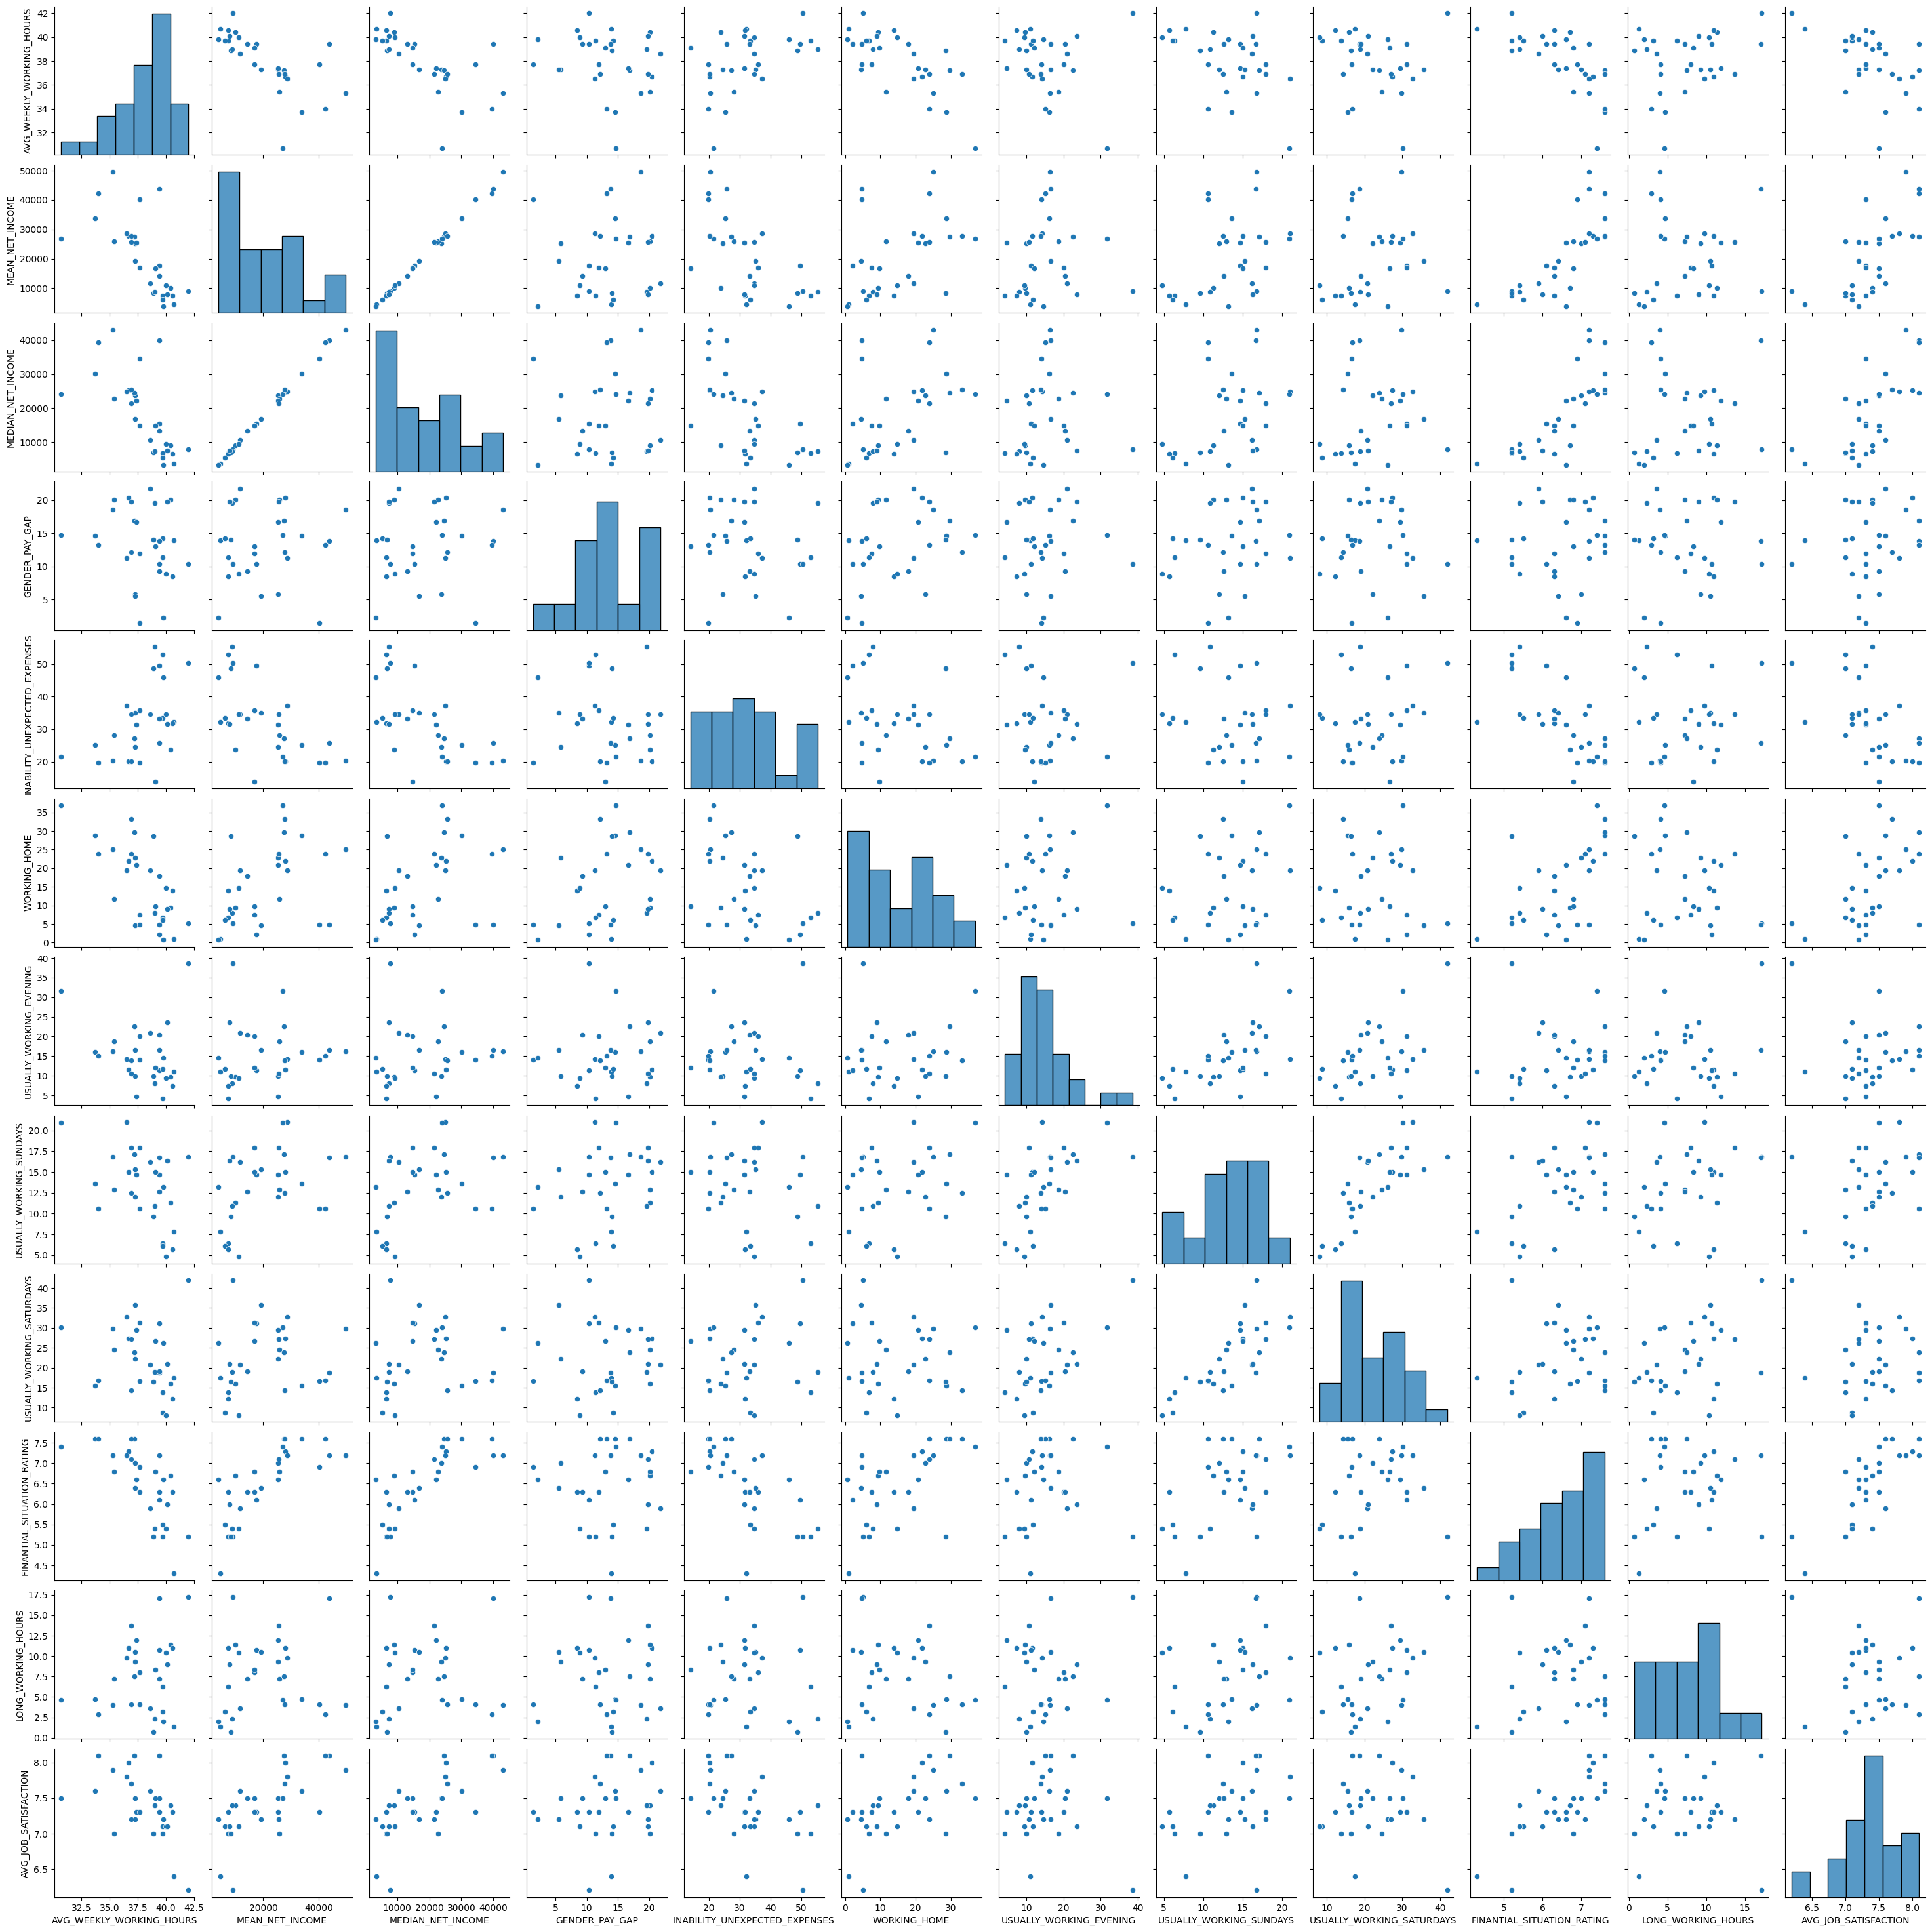

In [298]:
# Plot scatter matrix
sns.pairplot(inputed_data)

In [299]:
# Display Pearson correlation value for each variable with the Job satisfaction variable

from scipy import stats

coeficients_list = []

# For each indicator we get the pearson coefficient with Happiness Score and the P value
for indicator in variables:
    pearson_coef , p_value = stats.pearsonr(inputed_data[indicator],inputed_data["AVG_JOB_SATISFACTION"])
    coeficients_list.append([indicator,pearson_coef,p_value])
    
# Show our data as a Dataframe    
coeficients_df = pd.DataFrame(coeficients_list)
coeficients_df.columns = ["Indicator","Pearson coefficient", "P Value"]
coeficients_df.set_index("Indicator", inplace = True)
coeficients_df

,Pearson coefficient,P Value
Indicator,,
AVG_WEEKLY_WORKING_HOURS,-0.513847,3.108396e-03
MEAN_NET_INCOME,0.673117,3.335260e-05
MEDIAN_NET_INCOME,0.692059,1.612525e-05
GENDER_PAY_GAP,0.190555,3.045087e-01
INABILITY_UNEXPECTED_EXPENSES,-0.530010,2.164668e-03
WORKING_HOME,0.499067,4.263128e-03
USUALLY_WORKING_EVENING,-0.102656,5.826402e-01
USUALLY_WORKING_SUNDAYS,0.332749,6.739165e-02
USUALLY_WORKING_SATURDAYS,-0.073353,6.949408e-01


In [300]:
inputed_data.reset_index().head()

,GEO,AVG_WEEKLY_WORKING_HOURS,MEAN_NET_INCOME,MEDIAN_NET_INCOME,GENDER_PAY_GAP,INABILITY_UNEXPECTED_EXPENSES,WORKING_HOME,USUALLY_WORKING_EVENING,USUALLY_WORKING_SUNDAYS,USUALLY_WORKING_SATURDAYS,FINANTIAL_SITUATION_RATING,LONG_WORKING_HOURS,AVG_JOB_SATISFACTION,COUNTRY
0,AT,36.7,27804.0,25176.0,20.4,20.1,21.90,11.5,15.0,27.4,7.3,11.0,8.0,Austria
1,BE,37.3,25196.0,23686.0,5.8,24.5,22.70,9.9,12.0,22.2,7.0,9.3,7.5,Belgium
2,BG,40.7,4644.0,3590.0,13.9,32.1,0.90,11.1,7.8,17.5,4.3,1.3,6.4,Bulgaria
3,CH,35.3,49607.0,43013.0,18.6,20.4,25.06,16.3,16.8,29.8,7.2,4.0,7.9,Switzerland
4,CY,39.4,17582.0,15336.0,10.4,49.5,2.10,11.3,14.7,31.1,6.1,10.7,7.3,Cyprus


#### Map visualizations

In [301]:
import geopandas as gpd
geodata = gpd.read_file('countries.geojson')
print(geodata.head())

         ADMIN ISO_A3                                           geometry
0        Aruba    ABW  POLYGON ((-69.99694 12.57758, -69.93639 12.531...
1  Afghanistan    AFG  POLYGON ((71.04980 38.40866, 71.05714 38.40903...
2       Angola    AGO  MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -...
3     Anguilla    AIA  MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ...
4      Albania    ALB  POLYGON ((19.74777 42.57890, 19.74601 42.57993...


In [302]:
# Real ISO 3 data file
iso_country_data = pd.read_csv("countries_iso_data.csv")
iso_country_data.head()

,Standard Country Name,ISOA2,ISOA3
0,Afghanistan,AF,AFG
1,Aland Islands,AX,ALA
2,Albania,AL,ALB
3,Algeria,DZ,DZA
4,American Samoa,AS,ASM


In [303]:
# Create a dictionary to map ISO 2 to ISO 3 country code
iso_dict = dict(zip(iso_country_data['ISOA2'], iso_country_data['ISOA3']))

# Map ISO 2 country code and add the ISO 3 country code as a variable to the dataframe
inputed_data['ISOA3'] = inputed_data.index.map(lambda x : iso_dict[x])
inputed_data.head()

,AVG_WEEKLY_WORKING_HOURS,MEAN_NET_INCOME,MEDIAN_NET_INCOME,GENDER_PAY_GAP,INABILITY_UNEXPECTED_EXPENSES,WORKING_HOME,USUALLY_WORKING_EVENING,USUALLY_WORKING_SUNDAYS,USUALLY_WORKING_SATURDAYS,FINANTIAL_SITUATION_RATING,LONG_WORKING_HOURS,AVG_JOB_SATISFACTION,COUNTRY,ISOA3
GEO,,,,,,,,,,,,,,
AT,36.7,27804.0,25176.0,20.4,20.1,21.90,11.5,15.0,27.4,7.3,11.0,8.0,Austria,AUT
BE,37.3,25196.0,23686.0,5.8,24.5,22.70,9.9,12.0,22.2,7.0,9.3,7.5,Belgium,BEL
BG,40.7,4644.0,3590.0,13.9,32.1,0.90,11.1,7.8,17.5,4.3,1.3,6.4,Bulgaria,BGR
CH,35.3,49607.0,43013.0,18.6,20.4,25.06,16.3,16.8,29.8,7.2,4.0,7.9,Switzerland,CHE
CY,39.4,17582.0,15336.0,10.4,49.5,2.10,11.3,14.7,31.1,6.1,10.7,7.3,Cyprus,CYP


##### Plots

In [323]:
# Uncomment to visualize
"""
fig = px.choropleth(inputed_data, geojson=geodata, locations='ISOA3', color='AVG_JOB_SATISFACTION',
                           featureidkey="properties.ISO_A3",
                           hover_name="COUNTRY",
                           color_continuous_scale="deep",
                           range_color=(6, 10),
                           labels={"AVG_JOB_SATISFACTION": 'Avg Job Satisfaction'},
                           scope="europe"
                          )
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})


fig.update_layout(
    title='Average Job Satisfaction in European Countries<br><sup>Data extracted for 2018 from the Eurostat site</sup>',
)

# Add values
fig.add_scattergeo(
    locations=inputed_data['ISOA3'],
    text=inputed_data['AVG_JOB_SATISFACTION'],
    mode='text'
    
)


fig.update_layout(
    autosize=False,
    width=1200,
    height=700
)

# To save as an image
#fig.write_image("Images/map_js.png")

fig.show()
"""

'\nfig = px.choropleth(inputed_data, geojson=geodata, locations=\'ISOA3\', color=\'AVG_JOB_SATISFACTION\',\n                           featureidkey="properties.ISO_A3",\n                           hover_name="COUNTRY",\n                           color_continuous_scale="deep",\n                           range_color=(6, 10),\n                           labels={"AVG_JOB_SATISFACTION": \'Avg Job Satisfaction\'},\n                           scope="europe"\n                          )\nfig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})\n\n\nfig.update_layout(\n    title=\'Average Job Satisfaction in European Countries<br><sup>Data extracted for 2018 from the Eurostat site</sup>\',\n)\n\n# Add values\nfig.add_scattergeo(\n    locations=inputed_data[\'ISOA3\'],\n    text=inputed_data[\'AVG_JOB_SATISFACTION\'],\n    mode=\'text\'\n    \n)\n\n\nfig.update_layout(\n    autosize=False,\n    width=1200,\n    height=700\n)\n\n# To save as an image\n#fig.write_image("Images/map_js.png")\n\nfig.sh

In [305]:
# Uncomment to visualize
"""
fig = px.choropleth(inputed_data, geojson=geodata, locations='ISOA3', color='MEAN_NET_INCOME',
                           featureidkey="properties.ISO_A3",
                           hover_name="COUNTRY",
                           color_continuous_scale="RdYlGn",
                           range_color=(3000, 50000),
                           labels={"MEAN_NET_INCOME": 'Mean net income'},
                           scope="europe"
                          )
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})

fig.update_layout(
    title='Mean net income in European Countries<br><sup>Data extracted for 2018 from the Eurostat site</sup>'
)


fig.update_layout(
    autosize=False,
    width=1200,
    height=700
)

# To save as an image
#fig.write_image("Images/mean_income_map.png")

fig.show()
"""

'\nfig = px.choropleth(inputed_data, geojson=geodata, locations=\'ISOA3\', color=\'MEAN_NET_INCOME\',\n                           featureidkey="properties.ISO_A3",\n                           hover_name="COUNTRY",\n                           color_continuous_scale="RdYlGn",\n                           range_color=(3000, 50000),\n                           labels={"MEAN_NET_INCOME": \'Mean net income\'},\n                           scope="europe"\n                          )\nfig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})\n\nfig.update_layout(\n    title=\'Mean net income in European Countries<br><sup>Data extracted for 2018 from the Eurostat site</sup>\'\n)\n\n\nfig.update_layout(\n    autosize=False,\n    width=1200,\n    height=700\n)\n\n# To save as an image\n#fig.write_image("Images/mean_income_map.png")\n\nfig.show()\n'

In [306]:
# Uncomment to visualize
"""
fig = px.choropleth(inputed_data, geojson=geodata, locations='ISOA3', color='WORKING_HOME',
                           featureidkey="properties.ISO_A3",
                           hover_name="COUNTRY",
                           color_continuous_scale="Peach",
                           range_color=(0, 40),
                           labels={"WORKING_HOME": 'Working from home percentage (%)'},
                           scope="europe"
                          )
fig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})

fig.update_layout(
    title='Percentage of home workers in European Countries <br><sup>Data extracted for 2018 from the Eurostat site</sup>'
)

# Add values
fig.add_scattergeo(
    locations=inputed_data['ISOA3'],
    text=inputed_data['WORKING_HOME'],
    mode='text'
    
)


fig.update_layout(
    autosize=False,
    width=1200,
    height=700
)

# To save as an image
#fig.write_image("Images/working_home_map.png")

fig.show()
"""

'\nfig = px.choropleth(inputed_data, geojson=geodata, locations=\'ISOA3\', color=\'WORKING_HOME\',\n                           featureidkey="properties.ISO_A3",\n                           hover_name="COUNTRY",\n                           color_continuous_scale="Peach",\n                           range_color=(0, 40),\n                           labels={"WORKING_HOME": \'Working from home percentage (%)\'},\n                           scope="europe"\n                          )\nfig.update_layout(margin={"r":0,"t":50,"l":0,"b":0})\n\nfig.update_layout(\n    title=\'Percentage of home workers in European Countries <br><sup>Data extracted for 2018 from the Eurostat site</sup>\'\n)\n\n# Add values\nfig.add_scattergeo(\n    locations=inputed_data[\'ISOA3\'],\n    text=inputed_data[\'WORKING_HOME\'],\n    mode=\'text\'\n    \n)\n\n\nfig.update_layout(\n    autosize=False,\n    width=1200,\n    height=700\n)\n\n# To save as an image\n#fig.write_image("Images/working_home_map.png")\n\nfig.sho

## ML Models creation

### Multiple linear regression

In [307]:
from sklearn.linear_model import LinearRegression

# Create a LinearModel object
lm = LinearRegression()

# Prepare our indicators
indicators = variables.copy()
indicators.remove("AVG_JOB_SATISFACTION")
indicators.remove("MEDIAN_NET_INCOME")

# Prepare our datasets
X = inputed_data[indicators]
Y = inputed_data[["AVG_JOB_SATISFACTION"]]

In [308]:
# Fit our model
lm.fit(X,Y)

model = "Job satisfaction = " + str(lm.intercept_[0]) + "\n"

for i, indicator in enumerate(indicators):
    model = model + " + " + str(lm.coef_[0][i]) + " * ("+str(indicator)+") \n"

print(model)

Job satisfaction = 2.5464001998166284
 + 0.05705750331792453 * (AVG_WEEKLY_WORKING_HOURS) 
 + 1.0437406598238031e-05 * (MEAN_NET_INCOME) 
 + 0.007962959722123634 * (GENDER_PAY_GAP) 
 + 0.004705010994614067 * (INABILITY_UNEXPECTED_EXPENSES) 
 + 0.002823620997391041 * (WORKING_HOME) 
 + -0.011159599220427897 * (USUALLY_WORKING_EVENING) 
 + 0.038588287628079865 * (USUALLY_WORKING_SUNDAYS) 
 + -0.018227687247942305 * (USUALLY_WORKING_SATURDAYS) 
 + 0.36265884153241446 * (FINANTIAL_SITUATION_RATING) 
 + -0.01793889869539406 * (LONG_WORKING_HOURS) 



In [309]:
# Import packages
import seaborn as sns
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Create our predictions
yhat = lm.predict(X)

R1 = lm.score(X,Y)
MSE1 = mean_squared_error(Y,yhat)

print("R square value = ",R1)
print("MSE = ", MSE1)

R square value =  0.7709545964002739
MSE =  0.04281075483307261


Text(6, 0.8, 'MSE = 0.043')

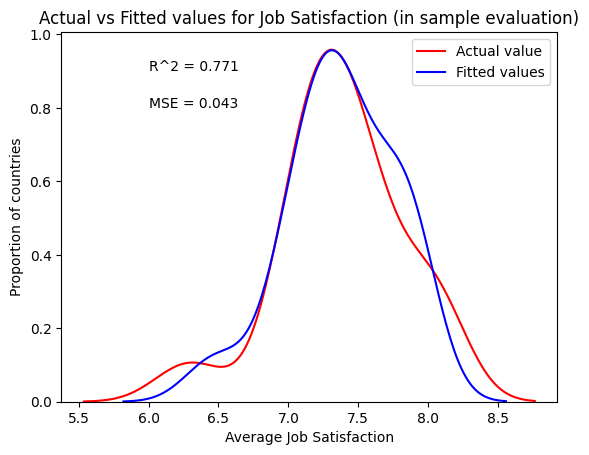

In [310]:
# Plot a distribution plot
ax1 = sns.distplot(Y, hist=False, color = "r", label="Actual value")
sns.distplot(yhat, hist=False, color="b", label ="Fitted values", ax = ax1)
# First plot
ax1.set_title("Actual vs Fitted values for Job Satisfaction (in sample evaluation)")
ax1.set_xlabel("Average Job Satisfaction")
ax1.set_ylabel("Proportion of countries")
ax1.legend()
ax1.text(6, .9, ("R^2 = "+ str("%.3f" % R1)))
ax1.text(6, .8, ("MSE = "+ str("%.3f" % MSE1)))  


### Polynomial regression

In [311]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

Text(0.5, 1.0, 'R^2 Using test data')

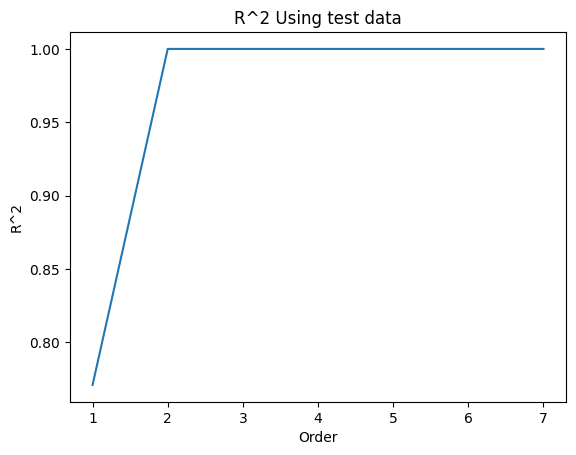

In [312]:
rsqu_test = []
order = [1,2,3,4,5,6,7]

for n in order :
    # Create a polynomial transformation of degree n
    pf = PolynomialFeatures(degree = n)
    x_train_pr = pf.fit_transform(X)

    # Create a Linear regression model
    poly = LinearRegression()
    poly.fit(x_train_pr, Y)

    # Add our score to the list
    rsqu_test.append(poly.score(x_train_pr, Y))
    

plt.plot(order, rsqu_test)
plt.xlabel("Order")
plt.ylabel("R^2")
plt.title("R^2 Using test data")

In [313]:
pf = PolynomialFeatures(degree = 2)
x_poly = pf.fit_transform(X)

# Create a Linear regression model
poly = LinearRegression()
poly.fit(x_poly, Y)

# Create our predictions
yhat = poly.predict(x_poly)
    
# In sample evaluation
R1 = poly.score(x_poly, Y)
MSE1 = mean_squared_error(Y,yhat)

print("R square value = ",R1)
print("MSE = ", MSE1)

R square value =  1.0
MSE =  4.498542929837757e-28


# TODO print polynomial coefficients

Text(6, 0.8, 'MSE = 0.000')

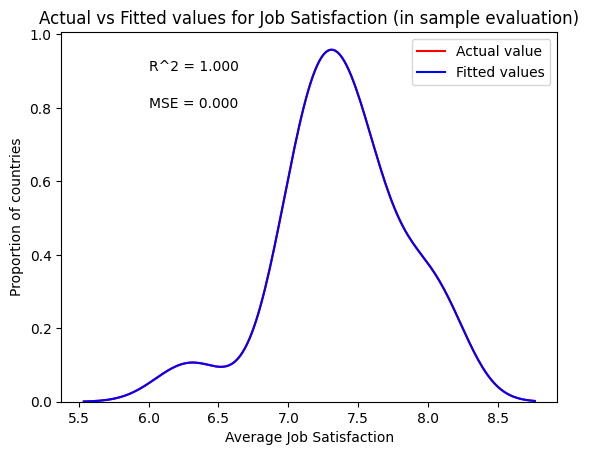

In [314]:
# Plot a distribution plot
ax1 = sns.distplot(Y, hist=False, color = "r", label="Actual value")
sns.distplot(yhat, hist=False, color="b", label ="Fitted values", ax = ax1)
# First plot
ax1.set_title("Actual vs Fitted values for Job Satisfaction (in sample evaluation)")
ax1.set_xlabel("Average Job Satisfaction")
ax1.set_ylabel("Proportion of countries")
ax1.legend()
ax1.text(6, .9, ("R^2 = "+ str("%.3f" % R1)))
ax1.text(6, .8, ("MSE = "+ str("%.3f" % MSE1)))  


### Decision Tree

In [315]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics
from sklearn.tree import export_graphviz
import graphviz
from sklearn import tree

In [316]:
# Prepare our indicators
indicators = variables.copy()
indicators.remove("AVG_JOB_SATISFACTION")
indicators.remove("MEDIAN_NET_INCOME")
indicators.remove("AVG_WEEKLY_WORKING_HOURS")
indicators.remove("FINANTIAL_SITUATION_RATING")

In [317]:
# Prepare our datasets
X = inputed_data[indicators]
Y = inputed_data["AVG_JOB_SATISFACTION"]

regr = DecisionTreeRegressor(max_depth=10, random_state=0)
model = regr.fit(X, Y)

y_hat = model.predict(X)

mean_squared_error(Y, y_hat)

0.0

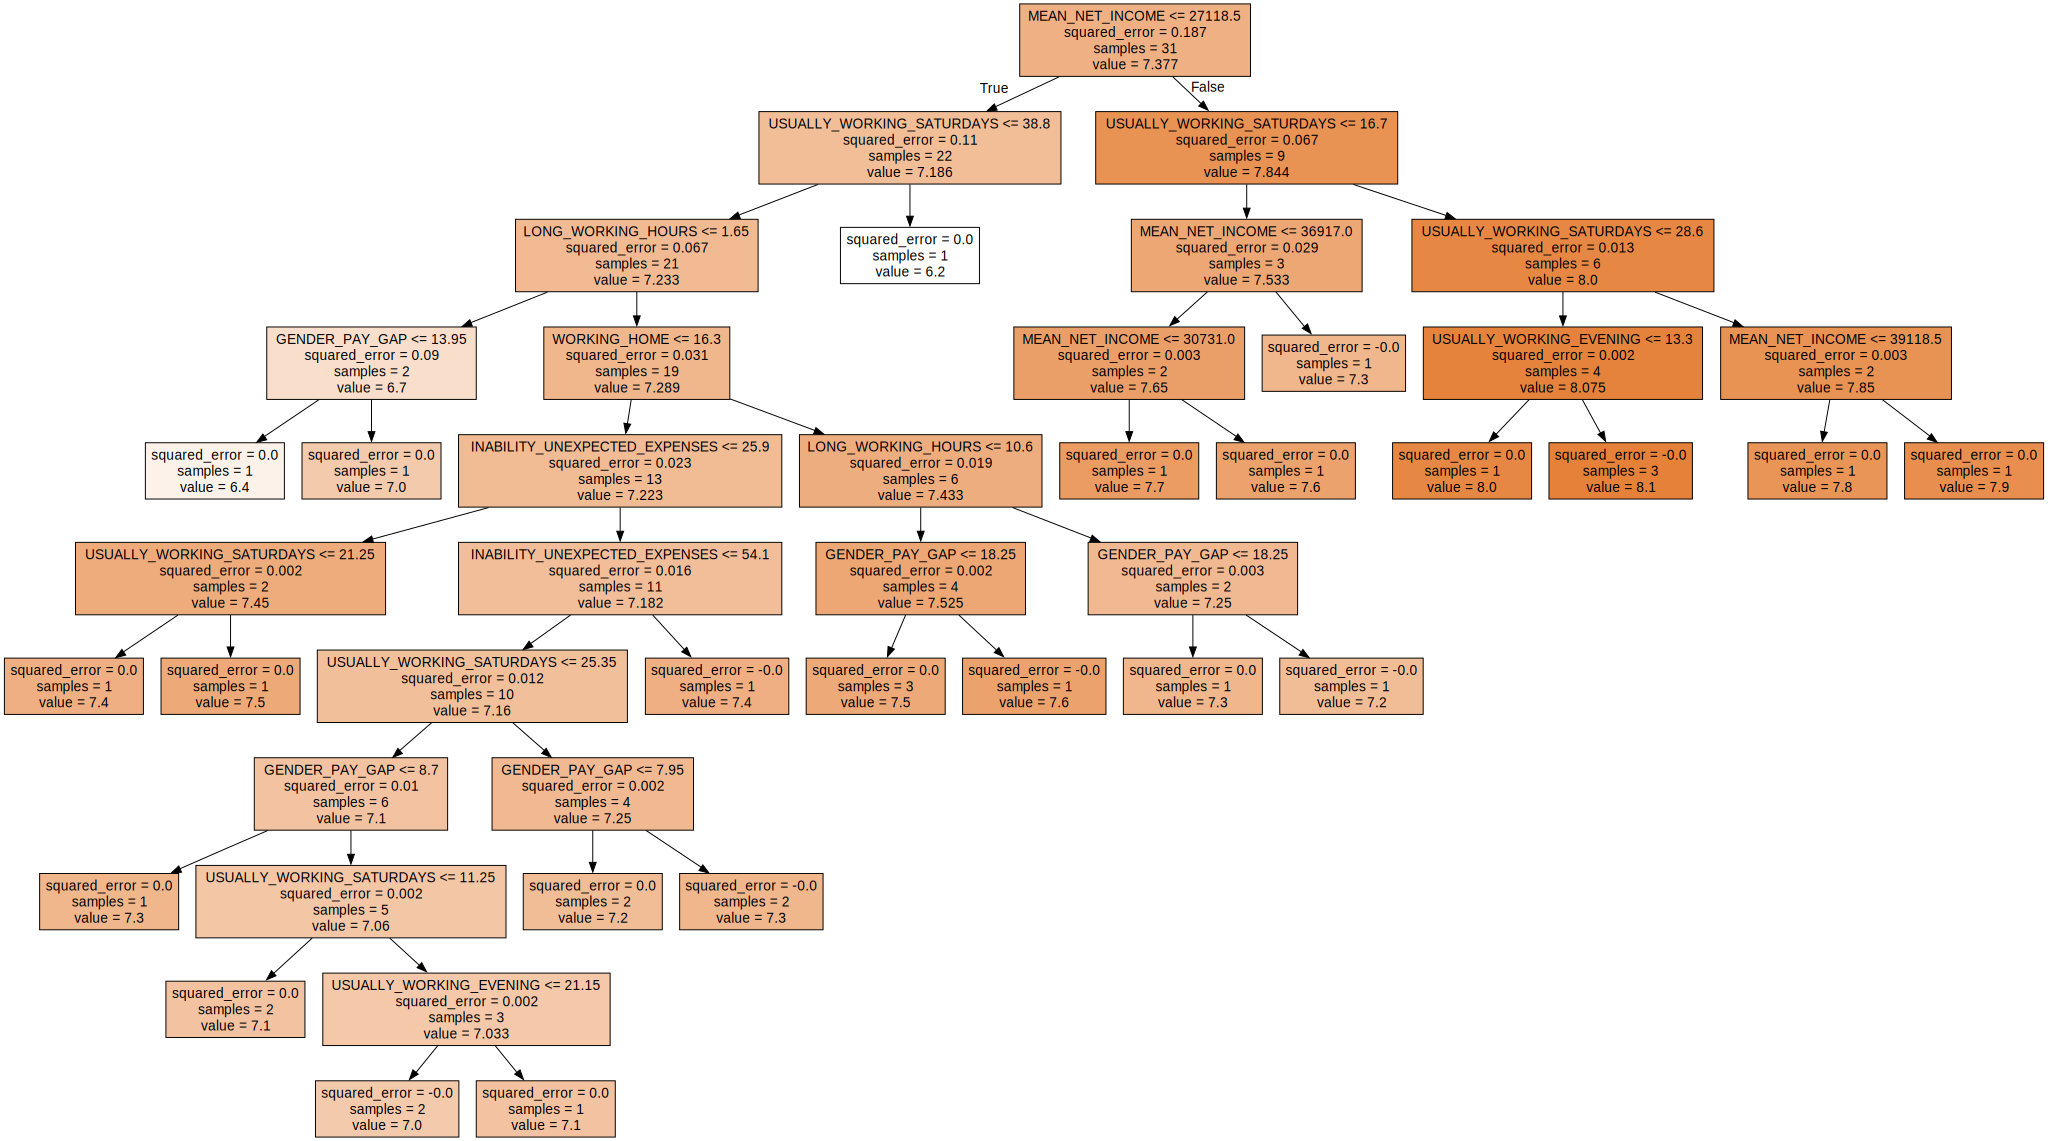

<Figure size 2500x2000 with 0 Axes>

In [318]:
fig = plt.figure(figsize=(25,20))
dot_data = tree.export_graphviz(regr, out_file=None, 
                                feature_names=indicators,  
                                filled=True)
graphviz.Source(dot_data, format="png") 

In [319]:
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
 print('%s, Score: %.5f' % (indicators[i],v))

MEAN_NET_INCOME, Score: 0.49321
GENDER_PAY_GAP, Score: 0.04323
INABILITY_UNEXPECTED_EXPENSES, Score: 0.03004
WORKING_HOME, Score: 0.03132
USUALLY_WORKING_EVENING, Score: 0.00244
USUALLY_WORKING_SUNDAYS, Score: 0.00000
USUALLY_WORKING_SATURDAYS, Score: 0.27383
LONG_WORKING_HOURS, Score: 0.12592


In [320]:
# Create indicators importance dataframe to analyse
indicators_importance = pd.DataFrame([indicators,importance]).transpose()
indicators_importance.columns=['Indicator','Importance']
indicators_importance

,Indicator,Importance
0,MEAN_NET_INCOME,0.493206
1,GENDER_PAY_GAP,0.043233
2,INABILITY_UNEXPECTED_EXPENSES,0.030043
3,WORKING_HOME,0.031322
4,USUALLY_WORKING_EVENING,0.002445
5,USUALLY_WORKING_SUNDAYS,0.0
6,USUALLY_WORKING_SATURDAYS,0.273831
7,LONG_WORKING_HOURS,0.12592


In [321]:
# plot feature importance
fig = px.bar(indicators_importance, x='Indicator', y='Importance', text_auto='.4', 
             title='Importance per indicator <br><sup>From Decision Tree model</sup>')
fig.update_traces(textfont_size=12, textangle=0, textposition="outside", cliponaxis=False)
fig.show()